/tmp/ipython-input-4214593287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2010-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0061
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 2.6774e-04
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 2.3964e-04
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 2.2092e-04
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 2.4260e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


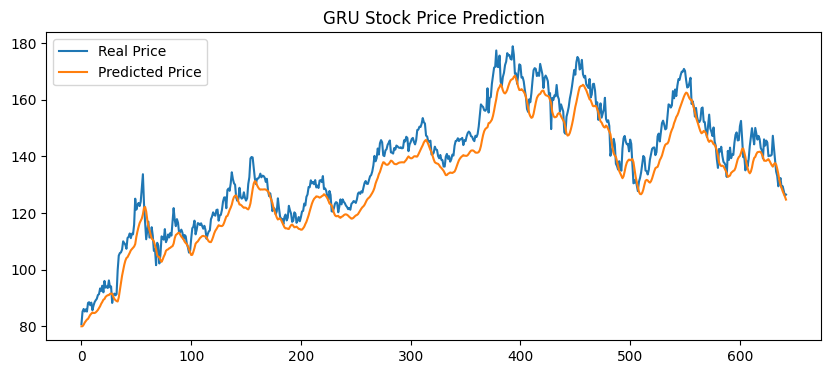

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# 1) Load data
data = yf.download("AAPL", start="2010-01-01", end="2023-01-01")
data = data[["Open"]]

# 2) Scale data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# 3) Create sequences
X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i])
    y.append(scaled[i])

X, y = np.array(X), np.array(y)

# 4) Split train-test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5) Build GRU model (simple!)
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# 6) Train
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 7) Predict
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
real = scaler.inverse_transform(y_test)

# 8) Plot
plt.figure(figsize=(10,4))
plt.plot(real, label="Real Price")
plt.plot(pred, label="Predicted Price")
plt.legend()
plt.title("GRU Stock Price Prediction")
plt.show()
